In [21]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df=pd.read_csv(r"C:\Users\nrhl1\OneDrive\Desktop\UTBootcamp\Challenges\credit-risk-classification\Credit_Risk\Resources\lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [6]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
X = df.iloc[:,0:7]


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [8]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [9]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [11]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [12]:
# Import the LogisticRegression module from SKLearn
#Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression(random_state=1)

# Fit the model using training data
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [13]:
# Make a prediction using the testing data
pred = lr.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [14]:
# Print the balanced_accuracy score of the model
#Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html
balanced_accuracy_score(y_test,pred)

0.9520479254722232

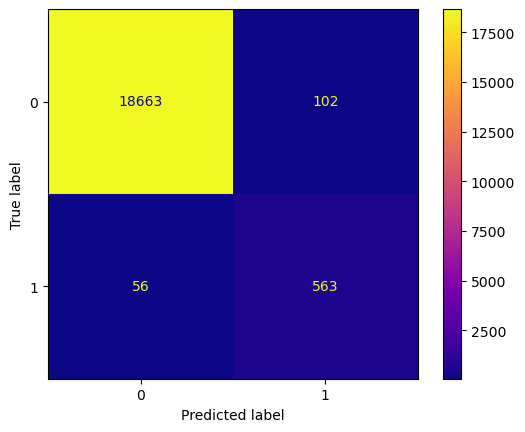

In [30]:
# Generate a confusion matrix for the model
#Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
#More Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
#Even More Documentation: https://matplotlib.org/stable/users/explain/colors/colormaps.html

from sklearn.metrics import ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,pred))
cmd.plot(cmap='plasma')
plt.show()

In [35]:
# Print the classification report for the model
#Docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

cr = classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** With an accuracy score of 95.2% and a False Positive Ratio of 15.3%, the model is just OK. Depending on the business and the thresholds leadership is looking for, this may or may not be acceptable. 

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [37]:
# Import the RandomOverSampler module form imbalanced-learn
# Documentation: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [38]:
# Count the distinct values of the resampled labels data
y_ros.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [39]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_ros = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
lr_ros.fit(X_ros,y_ros)

# Make a prediction using the testing data
pred_ros = lr_ros.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [40]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test,pred_ros)

0.9936781215845847

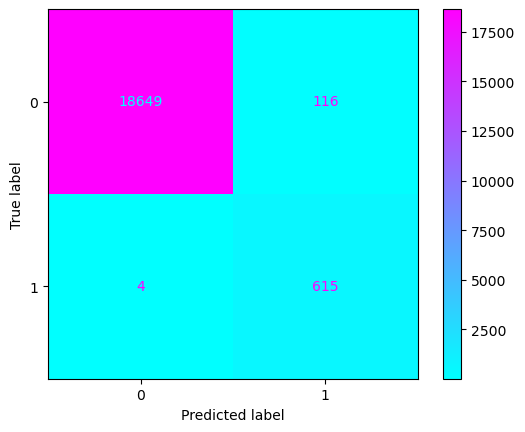

In [42]:
# Generate a confusion matrix for the model
cmd_ros = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,pred_ros))
cmd_ros.plot(cmap='cool')
plt.show()

In [43]:
# Print the classification report for the model
cr_ros = classification_report(y_test,pred_ros)
print(cr_ros)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** With an accuracy score of 99.3% and a False Positive Ratio (FPR) of 15.8%, the model is slightly better in terms of accuracy, but the FPR actually increased interestingly enough. This woule be indicate the model does not perform as well since more accounts would not be approved that should have been (leading to decreased assets to firm and lower revenue). 